In [105]:
import json
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots 

mpd_slice = 'C:/Users/aidik/Downloads/spotify/data/mpd.slice.0-999.json'
mpd_slice1 = '../data/mpd.slice.0-999.json'
mpd_slice2 = '../data/mpd.slice.1000-1999.json'

pc_path = '../data/mpd.slice.*.json'
files = glob.glob(pc_path)

# for file in files:
# with open(file, 'r') as f:
with open(mpd_slice2) as f:
    data = json.load(f)

df = pd.json_normalize(data['playlists'])
df.head()


,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,disney,false,1000,1457827200,189,16,1,"[{'pos': 0, 'artist_name': 'Original Broadway ...",4,31428282,65,NaN
1,Indie Electro,false,1001,1417824000,165,18,2,"[{'pos': 0, 'artist_name': 'The Octopus Projec...",2,38241566,8,NaN
2,jack & jack,false,1002,1465430400,17,14,1,"[{'pos': 0, 'artist_name': 'Jack & Jack', 'tra...",3,3549358,3,NaN
3,vibes,false,1003,1498435200,225,195,2,"[{'pos': 0, 'artist_name': 'LANY', 'track_uri'...",91,51242585,157,NaN
4,Indie,false,1004,1498608000,165,118,1,"[{'pos': 0, 'artist_name': 'Youth Lagoon', 'tr...",74,42601098,92,NaN


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1000 non-null   object
 1   collaborative  1000 non-null   object
 2   pid            1000 non-null   int64 
 3   modified_at    1000 non-null   int64 
 4   num_tracks     1000 non-null   int64 
 5   num_albums     1000 non-null   int64 
 6   num_followers  1000 non-null   int64 
 7   tracks         1000 non-null   object
 8   num_edits      1000 non-null   int64 
 9   duration_ms    1000 non-null   int64 
 10  num_artists    1000 non-null   int64 
 11  description    24 non-null     object
dtypes: int64(8), object(4)
memory usage: 93.9+ KB


To work with large datasets, break up the data into batches.

In [106]:
avg_time_ms = df['duration_ms'].mean()
avg_time_s = avg_time_ms / 1000
avg_time_min = avg_time_s / 60 #avg time in minutes
print(f"Avg playlist duration: {round(avg_time_min)} minutes")

Avg playlist duration: 259 minutes


In [107]:
avg_tracks = df['num_tracks'].mean()
print(f"Avg # of tracks: {avg_tracks}")

Avg # of tracks: 66.622


In [108]:
avg_follows = df['num_followers'].mean()
print(f"Avg # of followers: {avg_follows}")

Avg # of followers: 1.663


In [123]:
tracks = df['tracks']
tracks


0      [{'pos': 0, 'artist_name': 'Yiruma', 'track_ur...
1      [{'pos': 0, 'artist_name': 'The Dustbowl Reviv...
2      [{'pos': 0, 'artist_name': 'Broods', 'track_ur...
3      [{'pos': 0, 'artist_name': 'Talib Kweli', 'tra...
4      [{'pos': 0, 'artist_name': 'Baauer', 'track_ur...
                             ...                        
995    [{'pos': 0, 'artist_name': 'Unspoken', 'track_...
996    [{'pos': 0, 'artist_name': 'Pax217', 'track_ur...
997    [{'pos': 0, 'artist_name': 'Romeo Santos', 'tr...
998    [{'pos': 0, 'artist_name': 'Hillsong United', ...
999    [{'pos': 0, 'artist_name': 'Banda Los Recodito...
Name: tracks, Length: 1000, dtype: object

In [125]:
tracks[0]

[{'pos': 0,
  'artist_name': 'Yiruma',
  'track_uri': 'spotify:track:7fnqltLx83HsYLQajzCYRk',
  'artist_uri': 'spotify:artist:0fauHpmSHwodVYIjTqOGHz',
  'track_name': 'River Flows In You',
  'album_uri': 'spotify:album:0vIR7YccgfLA1f5wcXZa4Z',
  'duration_ms': 185013,
  'album_name': 'River Flows In You'},
 {'pos': 1,
  'artist_name': 'Frédéric Chopin',
  'track_uri': 'spotify:track:3w8507pR0Ncycrol0ZJOwP',
  'artist_uri': 'spotify:artist:7y97mc3bZRFXzT2szRM4L4',
  'track_name': 'Ballade No. 4 in F minor Op. 52',
  'album_uri': 'spotify:album:2ML75R6Z1LEFgPNZS0Ce3D',
  'duration_ms': 676000,
  'album_name': 'The Best of Chopin'},
 {'pos': 2,
  'artist_name': 'Alexander Pitamic',
  'track_uri': 'spotify:track:59E6rPql7W8q2sodZpg1qQ',
  'artist_uri': 'spotify:artist:4TuTJcUBhYyPoHYTSQzGAM',
  'track_name': 'Serenade für Streicher Nr. 13, G-Dur, KV 525: I. Allegro',
  'album_uri': 'spotify:album:3V8JHEeOhi7Z765C6v3Pqr',
  'duration_ms': 391000,
  'album_name': 'Wolfgang Amadeus Mozart: Si

In [ ]:
#how to access song names
playlist = 0
track = 0

tracks[playlist][track]['track_name']

'River Flows In You'

In [131]:
songs = set()

for i in range(1000):
    playlist = tracks[i]
    for j in range(len(playlist)):
        track_name = playlist[j]['track_name']
        songs.add(track_name)

print(songs)
print("unique songs:", len(songs))

{'I’m Good - Hucci Remix', 'Get Home (Get Right)', 'A Few Years Later', 'Por ti - con Susana Alva de Efecto Mariposa', 'M.I.L.F. $', "The 3 R's", 'How Great (feat. Jay Electronica & My cousin Nicole)', 'We Built This City', 'Lord of the Rings', 'Majestic', 'Hyrule Dungeon (Courage)', 'Paradinha', 'Which Ways - Instrumental', 'Rolling in the Deep', 'Rebel Heart', 'Courtesy Of The Red, White And Blue (The Angry American)', 'You - Tiësto vs. Twoloud Radio Edit', 'Jesus Loves Me', "God's Been Good", 'Is Anybody Out There?', 'Moondance', 'I Love, You Love', 'I Love To Boogie', 'Kiss', 'With You, Friends [Long Drive]', 'Killer Crane', 'Locked Out Of Heaven', 'Piano', 'Aerial Boundaries', 'A Little Fall of Rain', 'DARLING', 'I Do Adore', 'The Happy Song', 'Love No Limit', 'Kiss The Rain', "It's Gonna Be Me", 'Standing Still', 'Baby, I Love Your Way - Live', 'Need It', 'Thinking of You', 'Typical', 'Quiero Volar', 'Dark Times', 'Light My Candle', 'In The Name of Love (Do It All)', 'What Never 

In [109]:
# lets test the running time for loading the data of multiple slices
num_slices = 1 #must be between 1 and 1000
# takes ~4 minutes to load all slices
sum_of_avg = 0
total_max_follows = 0
for i in range(num_slices):
    if i == 0:
        pc_path = '../data/mpd.slice.0-999.json'
    else:
        pc_path = f'../data/mpd.slice.{i}000-{i}999.json'

    with open(pc_path) as f:
        data = json.load(f)
    df = pd.json_normalize(
        data['playlists'],
    )
    follows = df['num_followers']
    avg_follows = follows.mean()
    max_follows = follows.max()
    if max_follows > total_max_follows:
        total_max_follows = max_follows
    sum_of_avg += avg_follows

total_avg_follows = sum_of_avg / num_slices

print(f"Avg # of followers: {total_avg_follows}")
print(f"max follow: {total_max_follows}")

Avg # of followers: 2.583
max follow: 1038


In [110]:
MS_PER_MIN = 60_000

num_slices = 1000 #must be between 1 and 1000
# takes ~4 minutes to load all slices
sum_of_avg = 0
total_max_follows = 0
follow_series = pd.Series()
duration_series = pd.Series()
collab_series = pd.Series()
for i in range(num_slices):
    if i == 0:
        pc_path = '../data/mpd.slice.0-999.json'
    else:
        pc_path = f'../data/mpd.slice.{i}000-{i}999.json'

    with open(pc_path) as f:
        data = json.load(f)
    df = pd.json_normalize(data['playlists'])
    follows = df['num_followers']
    follow_series = pd.concat([follow_series, follows], ignore_index=True)

    durations = df['duration_ms'] / MS_PER_MIN 
    duration_series = pd.concat([duration_series, durations], ignore_index=True)

    collaborative = df['collaborative']
    collab_series = pd.concat([collab_series, collaborative], ignore_index=True)

collab_series

C:\Users\aidik\AppData\Local\Temp\ipykernel_23296\1691365912.py:20: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  follow_series = pd.concat([follow_series, follows], ignore_index=True)
C:\Users\aidik\AppData\Local\Temp\ipykernel_23296\1691365912.py:23: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  duration_series = pd.concat([duration_series, durations], ignore_index=True)


0         false
1         false
2         false
3         false
4         false
          ...  
999995    false
999996    false
999997    false
999998    false
999999    false
Length: 1000000, dtype: object

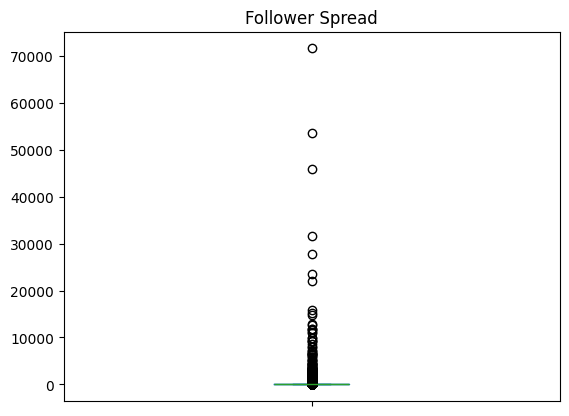

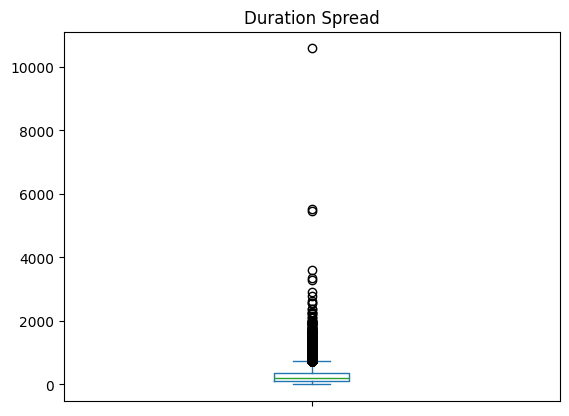

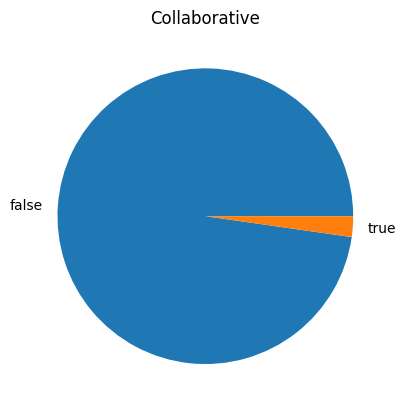

In [116]:
follow_series.plot.box(title="Follower Spread")
plt.show()

duration_series.plot.box(title="Duration Spread")
plt.show()
counts = collab_series.value_counts()
percents = counts / 10_000
percents.plot.pie(title="Collaborative")
plt.ylabel('')
plt.show()

In [117]:
percents

false    97.7431
true      2.2569
Name: count, dtype: float64

In [ ]:
# what is the most common playlist name?
# what is the most common song?
# how many unique songs are in the dataset?

# even if the other variables are not predictive for popularity, that is still a significant result that we can report

In [ ]:
# create train-test splits. What should the split be? 90/10?